### Titanic_survival_prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv")
df

ParserError: Error tokenizing data. C error: Expected 1 fields in line 34, saw 7


The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 

The dataset contains <b>passengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked</b> as input variable(features) and based on these features we have to predict the target variable <b>Survived.</b>

In [106]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [107]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [109]:
df.shape

(891, 12)

We see that this dataset contains 891 rows and 12 columns, This dataset contains both numerical and categorical data. This data has categorical columns like Sex, and embarked which needs to be encoded.

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We see that there are 891 rows and 12 columns in which  5 columns with integer datatype, 5 columns with string datatype and 2 columns with float datatype, we also observe that there are null values in Age, Cabin and embarked columns.

In [111]:
#check for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see that age has 177 nulls, Cabin has 687 nulls, embarked has only 2 nulls. Next we have to treat nulls. Since Cabin feature has more than 75% of data has nulls, we will drop the cabin column and treat only Age and embarked nulls. 

In [112]:
#check for value_counts in all columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length

In [113]:
#check for unique values
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#### Handling Missing Values

In [114]:
#first we will drop cabin columns, since it has highest null values 
df.drop(columns = ['Cabin'], axis =1, inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [115]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [116]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Now we have filled all the null values using mean and mode methods. But we will check again for null values if present. 

In [117]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We see there is no null values.

### Data Analysis

In [118]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

0    549
1    342
Name: Survived, dtype: int64


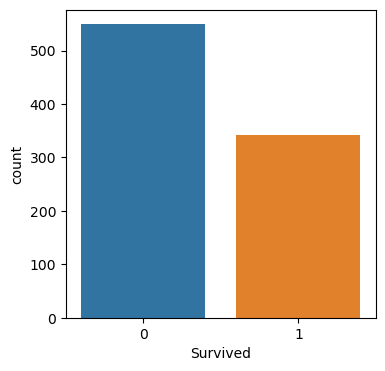

In [119]:
#count plot for Survived
plt.figure(figsize = (4,4))
sns.countplot(x = 'Survived', data = df)
print(df['Survived'].value_counts())
plt.show()

We observe that 549 people could not survive and only 342 people survived.

3    491
1    216
2    184
Name: Pclass, dtype: int64


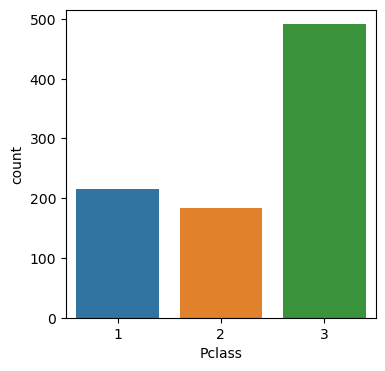

In [120]:
#count plot for Pclass
plt.figure(figsize = (4,4))
sns.countplot(x = 'Pclass', data = df)
print(df['Pclass'].value_counts())
plt.show()

We observe that there were highest number of people in third class compared to 1st and 2nd class.

male      577
female    314
Name: Sex, dtype: int64


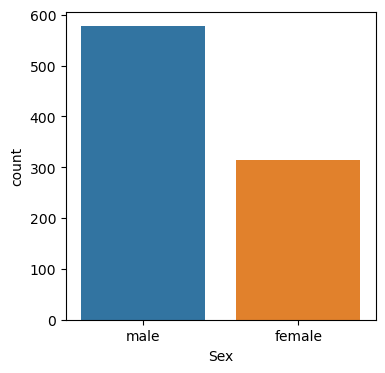

In [121]:
#count plot for sex
plt.figure(figsize = (4,4))
sns.countplot(x = 'Sex', data = df)
print(df['Sex'].value_counts())
plt.show()

We see that there were more male passengers than female passengers in the ship

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


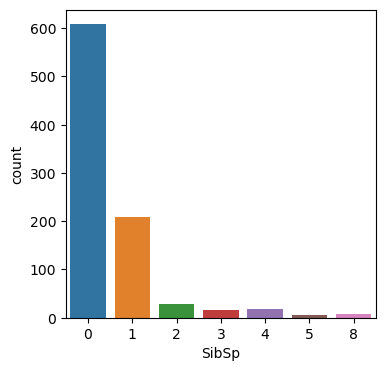

In [122]:
#count plot for SibSp
plt.figure(figsize = (4,4))
sns.countplot(x = 'SibSp', data = df)
print(df['SibSp'].value_counts())
plt.show()

We see that there were more members who were singles and one spouse or siblings and very less was 5 & 8 members family.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


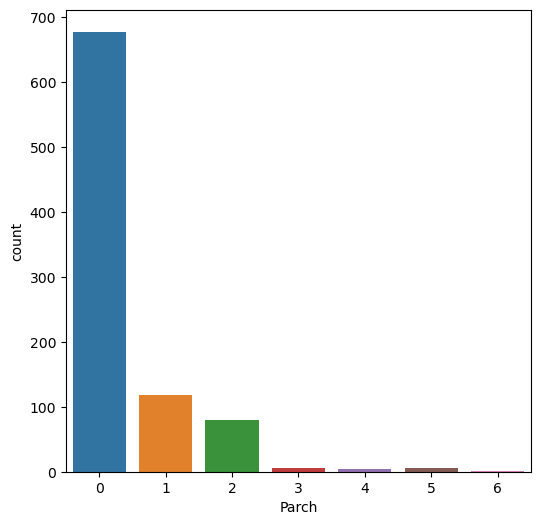

In [123]:
#count plot for parch 
plt.figure(figsize = (6,6))
sns.countplot(x = 'Parch', data = df)
print(df['Parch'].value_counts())
plt.show()

We see that there were more singles means members without childrens, and also there were more number of people who had single child, but 3,4,5 and 6 children was very less count.

S    646
C    168
Q     77
Name: Embarked, dtype: int64


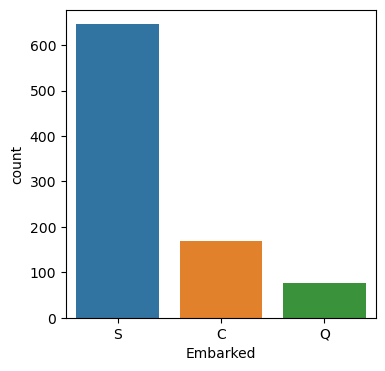

In [124]:
#count plot for embarked 
plt.figure(figsize = (4,4))
sns.countplot(x = 'Embarked', data = df)
print(df['Embarked'].value_counts())
plt.show()

we see that around 646 members boarded from southampton and 177 members from Cherbourg and very few boarded from Queenstown.

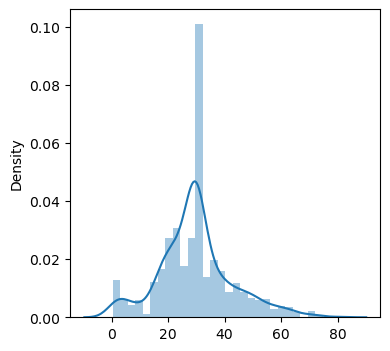

In [125]:
#Dist plot for Age
plt.figure(figsize = (4,4))
sns.distplot(x = df['Age'])
plt.show()

we observe that there were some babies below 1 year and very huge number of people around age 30, and also we observe that there were people who was above 60 years.

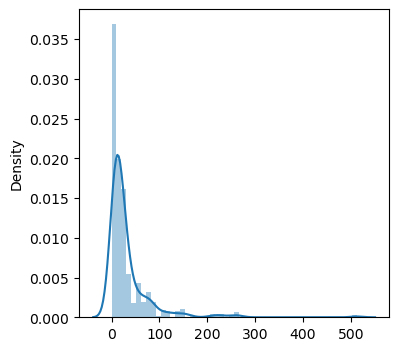

In [126]:
#Dist plot for Fare
plt.figure(figsize = (4,4))
sns.distplot(x = df['Fare'])
plt.show()

we see that there were more peoples who paid less than 10 pounds, and we also see there are some people who have paid around 500 pounds, we observe that there may be skewness in fare.

#### Bi-Variate Analysis

Now we will compare all the features with our target variable Survived.

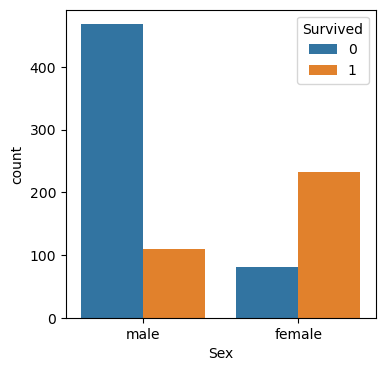

In [127]:
#survived based on Sex
plt.figure(figsize = (4,4))
sns.countplot(x='Sex', hue = 'Survived', data = df)
plt.show()

The death rate of male passengers is high compared to female passengers. 

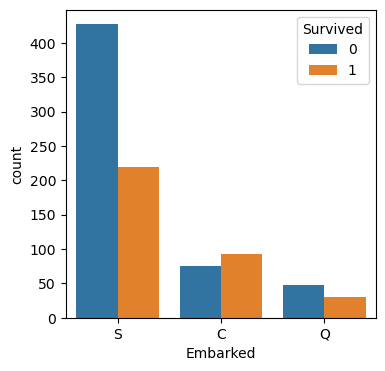

In [128]:
#survived based on Embarked
plt.figure(figsize = (4,4))
sns.countplot(x='Embarked', hue = 'Survived', data = df)
plt.show()

The passengers who were embarked from southampton has high survived and could not survive count compared to cherbourg and queenstown.

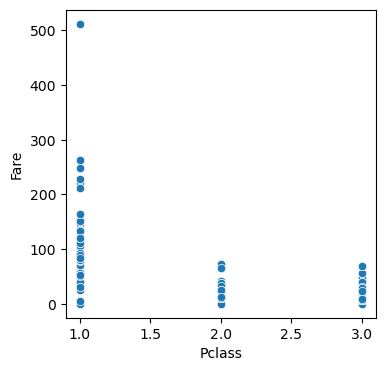

In [129]:
#Fare based on pClass
plt.figure(figsize = (4,4))
sns.scatterplot(x='Pclass', y = 'Fare', data = df)
plt.show()

The Fare paid by the first class passengers is more compared to second and third class passengers.

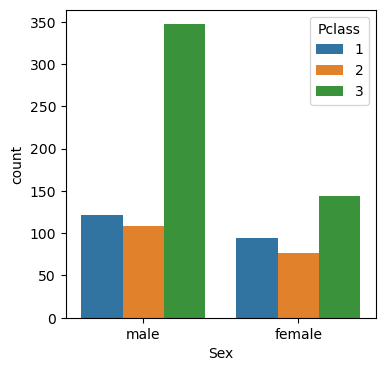

In [130]:
#Count of male and female passengers based on pClass
plt.figure(figsize = (4,4))
sns.countplot(x='Sex', hue = 'Pclass', data = df)
plt.show()

The Highest number of male passengers were in Third Class. The lowest number of female passengers were in second class.

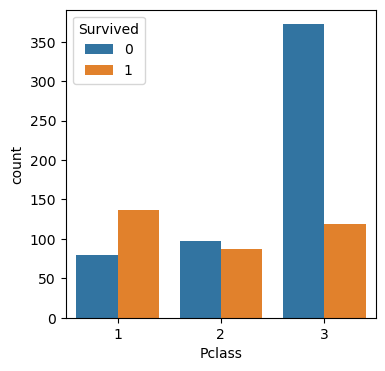

In [131]:
#survived based on pClass
plt.figure(figsize = (4,4))
sns.countplot(x='Pclass', hue = 'Survived', data = df)
plt.show()

The highest Number of passengers could not survive in 3rd class. The huge number of passengers survived in first class. In second class there is slight difference in passengers count of survival and also the death. And also we can see that the fare paid by the first class passengers is high and the survival count is also high. The passengers who were in first class were almost survived. 

Next we will go with encoding categorical data.

#### Data Encoding

In [132]:
df['Sex'].replace({'male':0,'female':1}, inplace=True)
df['Embarked'].replace({'S':0,'C':1,'Q':2}, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


Next is passengerID and names are unique for each data so we will drop the column, and ticket is also different for each data. So, we will drop unwanted Columns.

In [133]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [134]:
df.drop(columns = ['PassengerId','Name','Ticket'], axis =1, inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [135]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


1. Counts of all the columns are same which means no null values.
2. Standard Deviation is less compared to mean in most of the columns but we see high std deviation in columns like Sibsp, Parch and Fare.
3. Some features has huge difference between 75 percentile and max value which may have outliers.
4. Mean value is higher in columns sibsp, parch, Fare compared to median value which means right skewness, passenger Id and Age are having same mean and median.



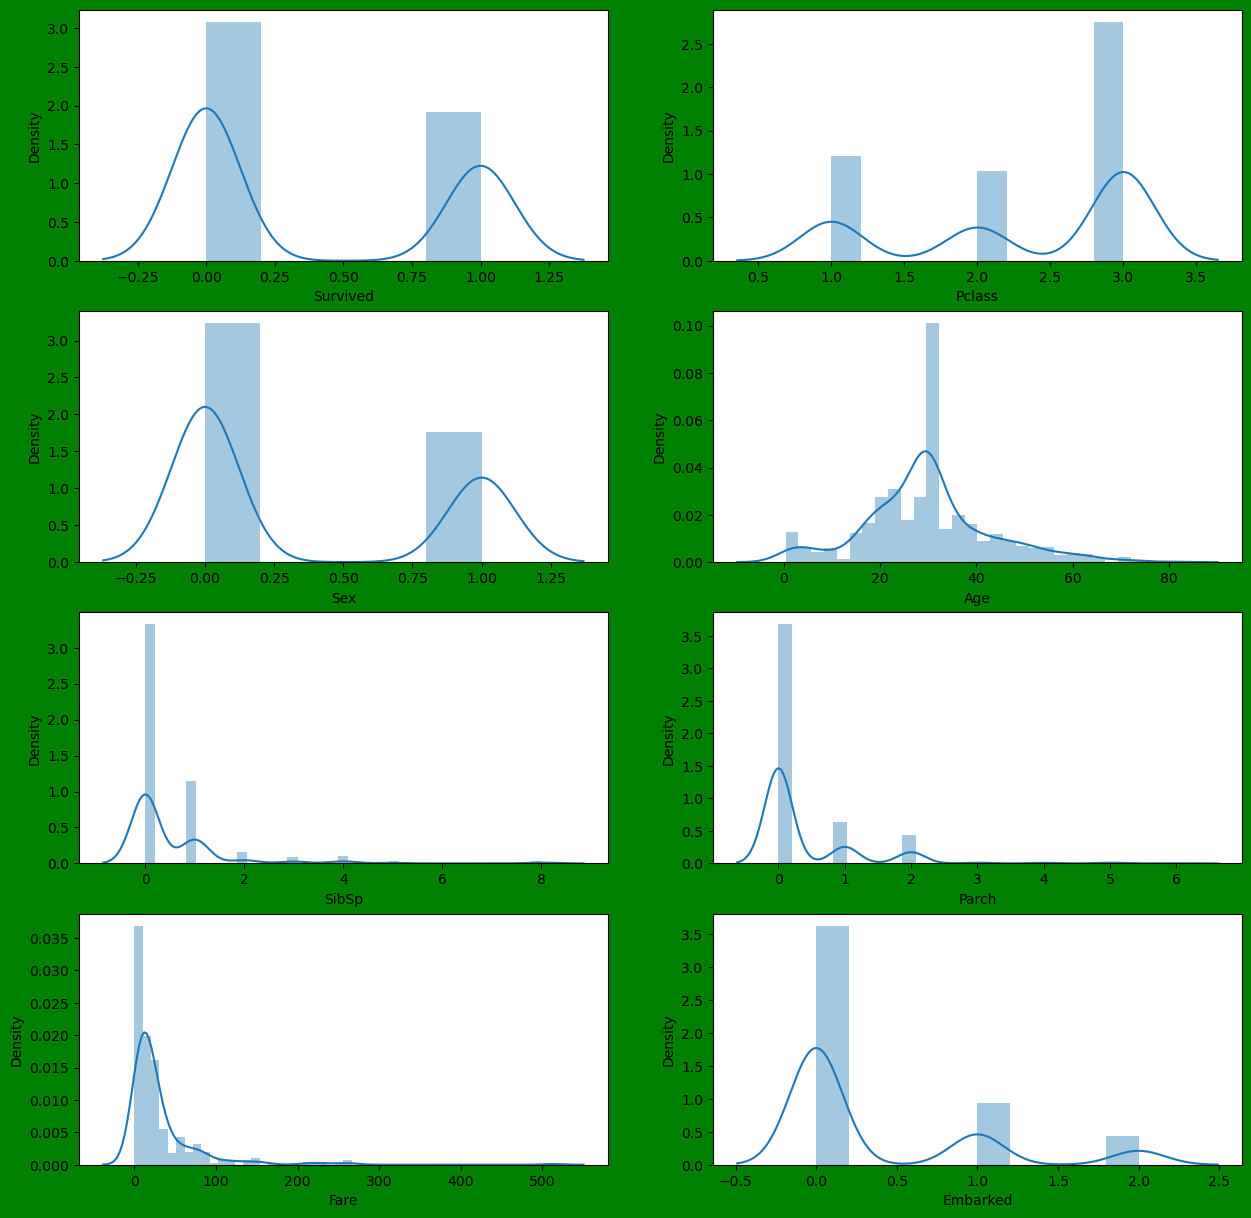

In [136]:
plt.figure(figsize =(15,15), facecolor = 'green')
num = 1
for column in df:
    if num <=8:
        ax = plt.subplot(4,2,num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()

As observed in describe method we see here also there is skewness in  age, SibSp, Parch, Fare Columns.

In [137]:
df.corr().sum()

Survived    1.545487
Pclass     -0.203994
Sex         1.986319
Age         0.201911
SibSp       1.444292
Parch       1.718768
Fare        1.419723
Embarked    1.200059
dtype: float64

All the columns are positively correlated except Pclass, the less correlated feature is age.

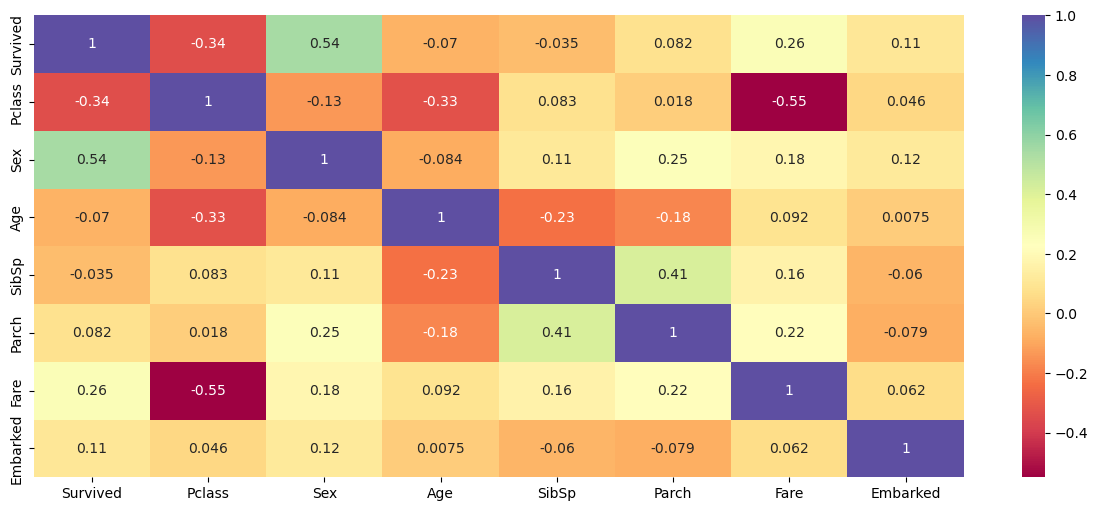

In [138]:
df_corr = df.corr()

plt.figure(figsize = (15,6))
sns.heatmap(df_corr,annot=True,annot_kws ={'size':10}, cmap = "Spectral")
plt.show()

We see there is no such higher correlation between features. only sibSp and Parch are slightly correlated.But, sex is corelated with target Survived.

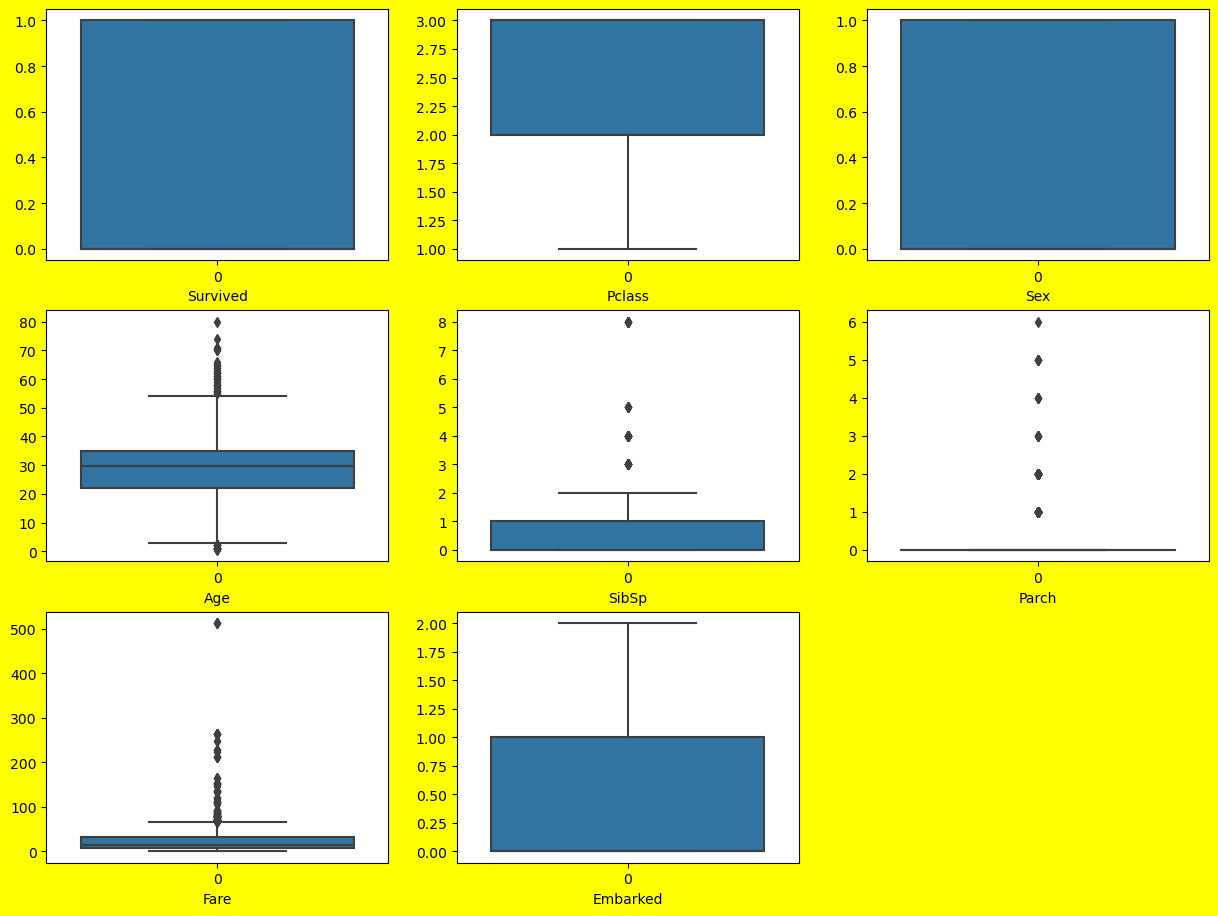

In [139]:
#check For Outliers
#plot BoxPlot
plt.figure(figsize =(15,15), facecolor = 'Yellow')
num = 1
for column in df:
    if num <=8:
        plt.subplot(4,3,num)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()

We see that SibSp, Parch are categorical so we dont treat outliers.But in age and fare columns we see huge outliers, so we need to treat them.

In [140]:
#treat Outliers
from scipy.stats import zscore
z = np.abs(zscore(df))
np.where(z>3) #threshold = 3
z_df=df[(z<3).all(axis=1)]
z_df.shape

(820, 8)

In [141]:
print("data_loss =   ", ((df.shape[0]-z_df.shape[0])/df.shape[0])*100)

data_loss =    7.968574635241302


In [142]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3-q1

iqr_df = df[~((df <(q1 - 1.5*iqr))| (df>(q3+1.5*iqr))).any(axis=1)]
iqr_df.shape

(577, 8)

In [143]:
print("data_loss =   ", ((df.shape[0]-iqr_df.shape[0])/df.shape[0])*100)

data_loss =    35.24130190796858


We find that there is data loss of 7.96% through z_score method and 35.24% through iqr_method. So we consider the z_score method as it has less very less data loss.

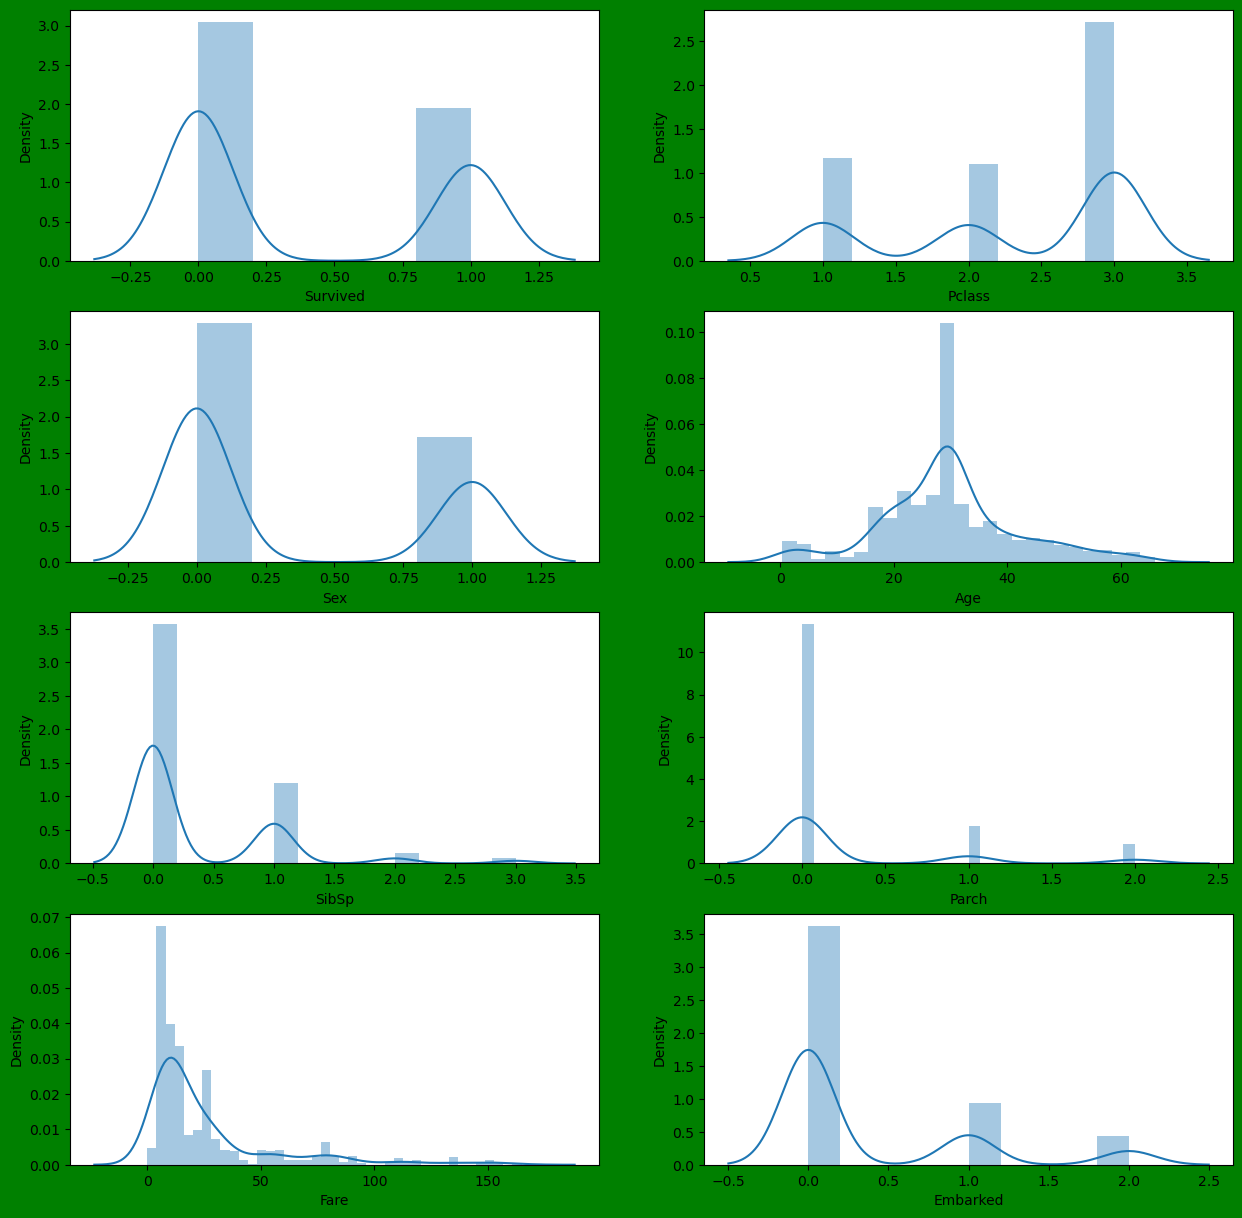

In [144]:
plt.figure(figsize =(15,15), facecolor = 'green')
num = 1
for column in z_df:
    if num <=8:
        ax = plt.subplot(4,2,num)
        sns.distplot(z_df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()

In [145]:
z_df.skew()

Survived    0.450825
Pclass     -0.632242
Sex         0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked    1.552592
dtype: float64

we see there is skewness in all columns except age and Survived. Since Pclass, Sex, SibSp, Parch, Embarked are categorical column we dont treat the skewness, so only fare columns has the skewness to be removed.

In [146]:
z_df['Fare'] = np.cbrt(z_df['Fare'])

In [147]:
z_df.skew()

Survived    0.450825
Pclass     -0.632242
Sex         0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        0.708623
Embarked    1.552592
dtype: float64

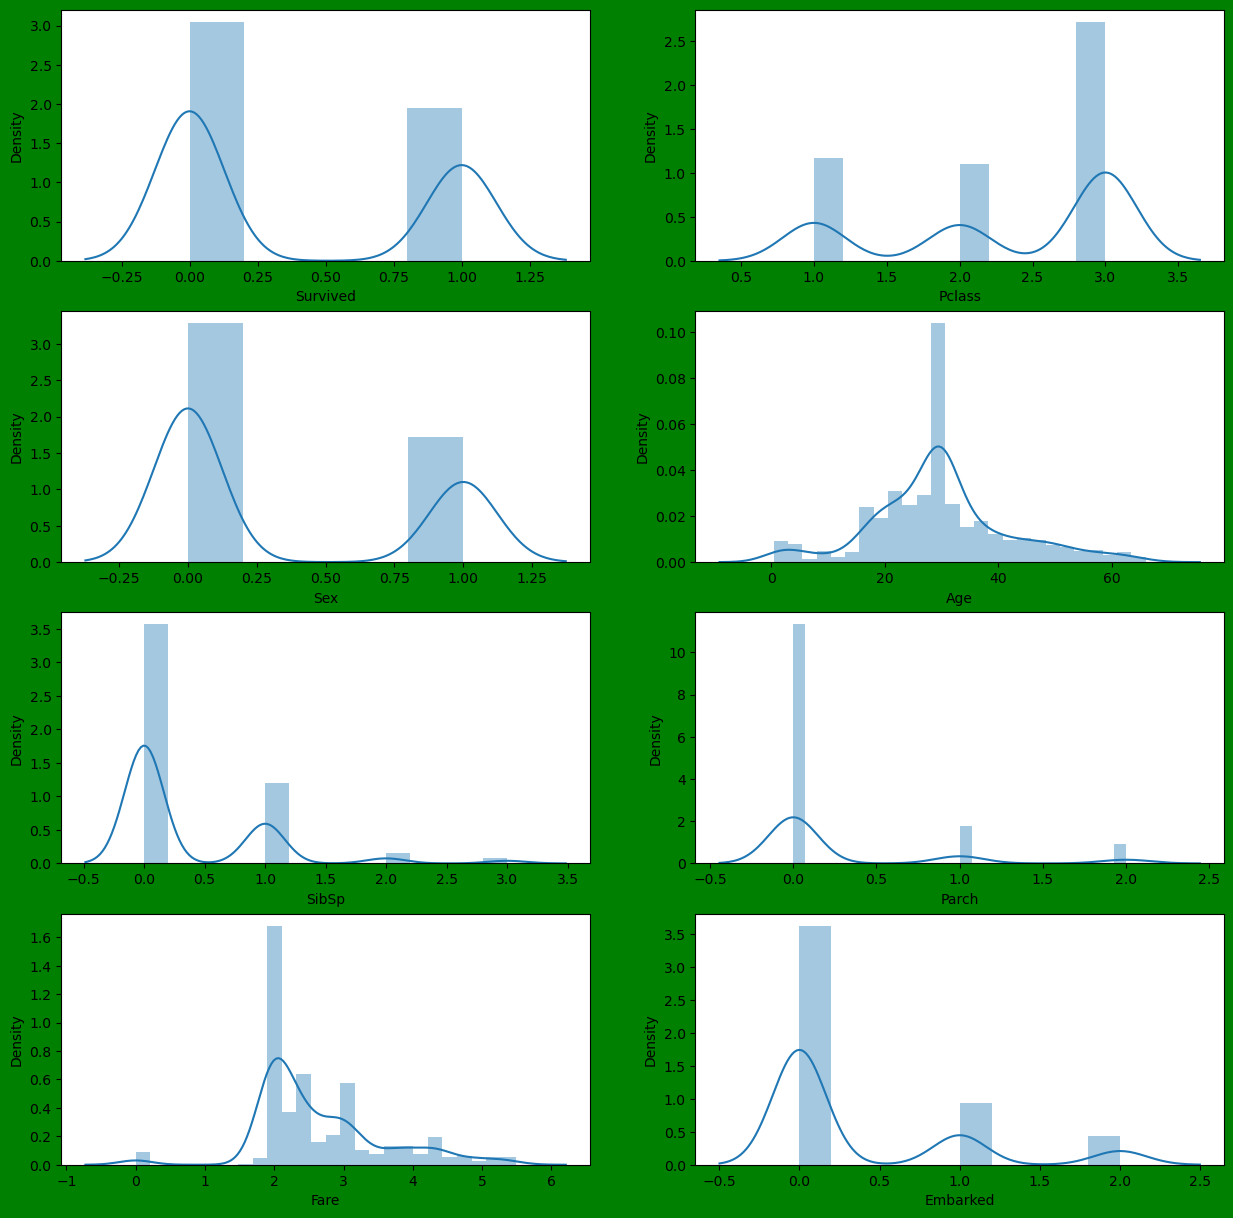

In [148]:
plt.figure(figsize =(15,15), facecolor = 'green')
num = 1
for column in z_df:
    if num <=8:
        ax = plt.subplot(4,2,num)
        sns.distplot(z_df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()

Still we see there is a skewness in Fare Column. But we will move forward since it has reduced from 2.318 to 0.70. so next we will check the correlation.

Now we will Check the correlation with the features and the target

In [150]:
z_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.322306,0.554888,-0.090926,0.094459,0.201071,0.363961,0.109718
Pclass,-0.322306,1.000000,-0.138041,-0.327522,-0.052312,-0.078366,-0.700239,0.070322
Sex,0.554888,-0.138041,1.000000,-0.094544,0.199204,0.251872,0.268761,0.137163
Age,-0.090926,-0.327522,-0.094544,1.000000,-0.148196,-0.259724,0.147130,0.004492
SibSp,0.094459,-0.052312,0.199204,-0.148196,1.000000,0.307210,0.320394,-0.027571
Parch,0.201071,-0.078366,0.251872,-0.259724,0.307210,1.000000,0.298987,-0.061809
Fare,0.363961,-0.700239,0.268761,0.147130,0.320394,0.298987,1.000000,0.018337
Embarked,0.109718,0.070322,0.137163,0.004492,-0.027571,-0.061809,0.018337,1.000000


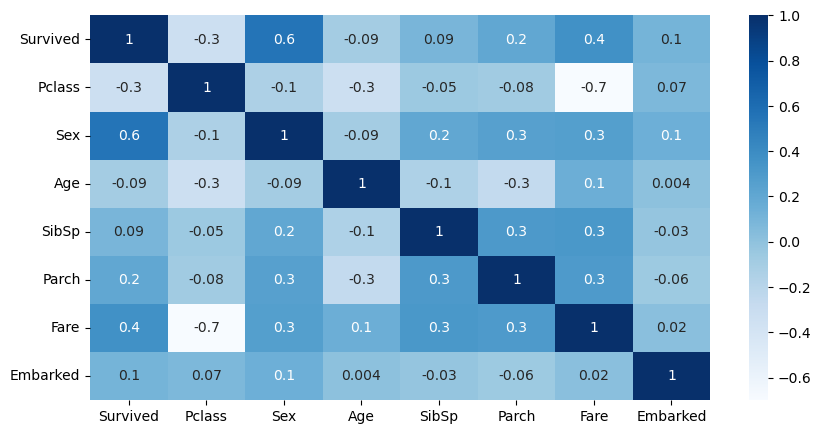

In [155]:
plt.figure(figsize = (10,5))
sns.heatmap(z_df.corr(), fmt = ".1g", annot=True, cmap = "Blues")
plt.show()

We see that there is no such highest correlation within features and also feature with target, only Sex colum has slight correlation with target and the next is Fare column is also slightly correlated with target. Pclass and Age are negatively correlated with target. SibSp, Parch and Embarked are positively Correlated with target.

In [156]:
z_df.corr().Survived.sort_values()

Pclass     -0.322306
Age        -0.090926
SibSp       0.094459
Embarked    0.109718
Parch       0.201071
Fare        0.363961
Sex         0.554888
Survived    1.000000
Name: Survived, dtype: float64

Again the same thing is proved here, that there is no such correlation with features and the target. Next we will go with standardizing the data.

#### Standard Scaler

In [157]:
#separate the target and features.
X = z_df.drop(['Survived'], axis = 1)
y = z_df['Survived']

In [158]:
X.shape

(820, 7)

In [159]:
y.shape

(820,)

In [162]:
from sklearn.preprocessing import StandardScaler

In [165]:
sr = StandardScaler()
X_sr = pd.DataFrame(sr.fit_transform(X), columns = X.columns)
X_sr

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.833995,-0.722036,-0.641702,1.051956,-0.451141,-0.766275,-0.566350
1,-1.586804,1.384973,0.675821,1.051956,-0.451141,1.623850,1.007912
2,0.833995,1.384973,-0.312321,-0.563407,-0.451141,-0.703257,-0.566350
3,-1.586804,1.384973,0.428785,1.051956,-0.451141,1.204749,-0.566350
4,0.833995,-0.722036,0.428785,-0.563407,-0.451141,-0.691984,-0.566350
...,...,...,...,...,...,...,...
815,-0.376405,-0.722036,-0.229976,-0.563407,-0.451141,-0.316660,-0.566350
816,-1.586804,1.384973,-0.888737,-0.563407,-0.451141,0.500522,-0.566350
817,0.833995,1.384973,-0.007717,1.051956,3.088912,0.235725,-0.566350
818,-1.586804,-0.722036,-0.312321,-0.563407,-0.451141,0.500522,1.007912


In [167]:
#now check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X_sr.values, i) for i in range(len(X_sr.columns))]
vif['Features'] = X_sr.columns

vif

,VIF Values,Features
0,2.332230,Pclass
1,1.159248,Sex
2,1.251172,Age
3,1.259578,SibSp
4,1.308473,Parch
5,2.575110,Fare
6,1.051587,Embarked


We see there is no such multicollinearity in any of the features. so next we will build the model before that we have to split data into train and test data.

In [173]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC

In [176]:
accuracy = 0
r_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_sr, y, test_size = 0.30, random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred = log.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>accuracy:
        accuracy = acc
        r_state = i
print("max accuracy score : ", accuracy,"at the random state: " , r_state)

max accuracy score :  0.8414634146341463 at the random state:  198


In [177]:
x_train,x_test,y_train,y_test = train_test_split(X_sr, y, test_size = 0.30, random_state = r_state)

In [178]:
x_train.shape

(574, 7)

In [179]:
x_test.shape

(246, 7)

In [182]:
log = LogisticRegression()
log.fit(x_train,y_train)
log_pred = log.predict(x_test)
log_pred_train = log.predict(x_train)
print("Logistic Regression")
print("Accuracy of train data is  ",accuracy_score(y_train, log_pred_train)*100, "%")
log_accu = accuracy_score(y_test, log_pred) 
print("Accuracy of test data is  ", (log_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,log_pred))
print('\n Test Classification Report \n', classification_report(y_test,log_pred))
print("****************************************")
print("\n")

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
rfc_pred_train = rfc.predict(x_train)
print("Random Forest Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, rfc_pred_train)*100, "%")
rfc_accu = accuracy_score(y_test, rfc_pred) 
print("Accuracy of test data is  ", (rfc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,rfc_pred))
print('\n Test Classification Report \n', classification_report(y_test,rfc_pred))
print("****************************************")
print("\n")

bc = BaggingClassifier()
bc.fit(x_train,y_train)
bc_pred = bc.predict(x_test)
bc_pred_train = bc.predict(x_train)
print("Bagging Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, bc_pred_train)*100, "%")
bc_accu = accuracy_score(y_test, bc_pred)
print("Accuracy of test data is  ", (bc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,bc_pred))
print('\n Test Classification Report \n', classification_report(y_test,bc_pred))
print("****************************************")
print("\n")

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred = abc.predict(x_test)
abc_pred_train = abc.predict(x_train)
print("AdaBoost Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, abc_pred_train)*100, "%")
abc_accu = accuracy_score(y_test, abc_pred)
print("Accuracy of test data is  ", (abc_accu) *100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,abc_pred))
print('\n Test Classification Report \n', classification_report(y_test,abc_pred))
print("****************************************")
print("\n")

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
gbc_pred_train = gbc.predict(x_train)
print("Gradient Boosting Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, gbc_pred_train)*100, "%")
gbc_accu = accuracy_score(y_test, gbc_pred) 
print("Accuracy of test data is  ", (gbc_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,gbc_pred))
print('\n Test Classification Report \n', classification_report(y_test,gbc_pred))
print("****************************************")
print("\n")

etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred = etc.predict(x_test)
etc_pred_train = etc.predict(x_train)
print("Extra Trees Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, etc_pred_train)*100, "%")
etc_accu = accuracy_score(y_test, etc_pred) 
print("Accuracy of test data is  ", (etc_accu)*100, "%")
print("\n Confusion Matrix", confusion_matrix(y_test,etc_pred))
print('\n Test Classification Report \n', classification_report(y_test,etc_pred))
print("****************************************")
print("\n")

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
dtc_pred_train = dtc.predict(x_train)
print("Decision Trees Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, dtc_pred_train)*100, "%")
dtc_accu = accuracy_score(y_test, dtc_pred) 
print("Accuracy of test data is  ", (dtc_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,dtc_pred))
print('\n Test Classification Report \n', classification_report(y_test,dtc_pred))
print("****************************************")
print("\n")

knn = KNN()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_pred_train = knn.predict(x_train)
print("K-Nearest Neighbors")
print("Accuracy of train data is  ",accuracy_score(y_train, knn_pred_train)*100, "%")
knn_accu = accuracy_score(y_test, knn_pred) 
print("Accuracy of test data is  ", (knn_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test, knn_pred))
print('\n Test Classification Report \n', classification_report(y_test, knn_pred))
print("****************************************")
print("\n")


svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_pred_train = svc.predict(x_train)
print("Super-Vector Classification")
print("Accuracy of train data is  ",accuracy_score(y_train, svc_pred_train)*100 , "%")
svc_accu = accuracy_score(y_test, svc_pred) 
print("Accuracy of test data is  ", (svc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test, svc_pred))
print('\n Test Classification Report \n', classification_report(y_test, svc_pred))
print("****************************************")
print("\n")




Logistic Regression
Accuracy of train data is   77.00348432055749 %
Accuracy of test data is   84.14634146341463 %

 Confusion Matrix [[132  20]
 [ 19  75]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       152
           1       0.79      0.80      0.79        94

    accuracy                           0.84       246
   macro avg       0.83      0.83      0.83       246
weighted avg       0.84      0.84      0.84       246

****************************************


Random Forest Classifier
Accuracy of train data is   98.25783972125436 %
Accuracy of test data is   81.70731707317073 %

 Confusion Matrix [[128  24]
 [ 21  73]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       152
           1       0.75      0.78      0.76        94

    accuracy                           0.82       246
   macro avg       0.81      0.

In [183]:
Accuracy = pd.DataFrame({'Models':['Logistic', 'RandomForest Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'GradientBoosting','ExtraTreesClassifier','DecisionTree', 'Knn','svc'],
                          'Accuracy_score':[log_accu, rfc_accu, bc_accu,abc_accu,gbc_accu,etc_accu,dtc_accu,knn_accu,svc_accu]
                        })
Accuracy


,Models,Accuracy_score
0,Logistic,0.841463
1,RandomForest Classifier,0.817073
2,Bagging Classifier,0.829268
3,AdaBoost Classifier,0.813008
4,GradientBoosting,0.865854
5,ExtraTreesClassifier,0.788618
6,DecisionTree,0.800813
7,Knn,0.829268
8,svc,0.890244


From the above dataframe we see that <b>svc is having higher accuracy in test data</b>, but when we compare accuracy of train data and test data, <b>knn is having almost the same accuracy in both train and test datasets</b>, and svc is having train score as 81% and test accuracy as 89% almost 8% of difference, so we consider <b>knn as the best model</b>, and next we will see the cross validation score of each model and then decide about the best model. 

#### Cross-validation score

In [185]:

print('\n Logistic Regression \n')
log_score = cross_val_score(log, X_sr, y, cv=10)
print(log_score)
print(np.mean(log_score))
log_diff = (log_accu - log_score.mean())
print(log_diff)
print("====================================\n ")
 
print('\n Random Forest Classifier \n')
rfc_score = cross_val_score(rfc, X_sr, y, cv=10)
print(rfc_score)
print(np.mean(rfc_score))
rfc_diff = (rfc_accu - rfc_score.mean())
print(rfc_diff)
print("====================================\n ")

print('\n Bagging Classifier \n')
bc_score = cross_val_score(bc, X_sr, y, cv=10)
print(bc_score)
print(np.mean(bc_score))
bc_diff = (bc_accu - bc_score.mean())
print(bc_diff)
print("====================================\n ")

print('\n AdaBoost Classifier \n')
abc_score = cross_val_score(abc, X_sr, y, cv=10)
print(abc_score)
print(np.mean(abc_score))
abc_diff = (abc_accu - abc_score.mean())
print(abc_diff)
print("====================================\n ")

print('\n Gradient Boosting Classifier \n')
gbc_score = cross_val_score(gbc, X_sr, y, cv=10)
print(gbc_score)
print(np.mean(gbc_score))
gbc_diff = (gbc_accu - gbc_score.mean())
print(gbc_diff)
print("====================================\n ")

print('\n ExtraTrees Classifier \n')
etc_score = cross_val_score(etc, X_sr, y, cv=10)
print(etc_score)
print(np.mean(etc_score))
etc_diff = (etc_accu - etc_score.mean())
print(etc_diff)
print("====================================\n ")

print('\n DecisionTree Classifier \n')
dtc_score = cross_val_score(dtc, X_sr, y, cv=10)
print(dtc_score)
print(np.mean(dtc_score))
dtc_diff = (dtc_accu - dtc_score.mean())
print(dtc_diff)
print("====================================\n ")

print('\n K-Neighbors Classifier \n')
knn_score = cross_val_score(knn, X_sr, y, cv=10)
print(knn_score)
print(np.mean(knn_score))
knn_diff = (knn_accu - knn_score.mean())
print(knn_diff)
print("====================================\n ")

print('\n Super Vector Classifier \n')
svc_score = cross_val_score(svc, X_sr, y, cv=10)
print(svc_score)
print(np.mean(svc_score))
svc_diff = (svc_accu - svc_score.mean())
print(svc_diff)
print("====================================\n ")






 Logistic Regression 

[0.81707317 0.7804878  0.76829268 0.80487805 0.7804878  0.75609756
 0.80487805 0.75609756 0.76829268 0.81707317]
0.7853658536585366
0.056097560975609695
 

 Random Forest Classifier 

[0.70731707 0.76829268 0.76829268 0.80487805 0.86585366 0.84146341
 0.81707317 0.7195122  0.84146341 0.85365854]
0.7987804878048781
0.018292682926829174
 

 Bagging Classifier 

[0.76829268 0.73170732 0.7195122  0.80487805 0.85365854 0.81707317
 0.80487805 0.74390244 0.84146341 0.80487805]
0.7890243902439025
0.040243902439024315
 

 AdaBoost Classifier 

[0.7804878  0.74390244 0.75609756 0.79268293 0.81707317 0.7804878
 0.82926829 0.7804878  0.80487805 0.85365854]
0.7939024390243903
0.019105691056910512
 

 Gradient Boosting Classifier 

[0.82926829 0.7804878  0.7804878  0.85365854 0.87804878 0.87804878
 0.82926829 0.7804878  0.81707317 0.82926829]
0.8256097560975612
0.040243902439024204
 

 ExtraTrees Classifier 

[0.76829268 0.7195122  0.76829268 0.81707317 0.87804878 0.81707317


In [186]:
CV_data = pd.DataFrame({'Models':['Logistic', 'RandomForest Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'GradientBoosting','ExtraTreesClassifier','DecisionTree', 'Knn','svc'],
                          'CV_score':[log_diff, rfc_diff, bc_diff,abc_diff,gbc_diff,etc_diff,dtc_diff,knn_diff,svc_diff]
                        })
CV_data


,Models,CV_score
0,Logistic,0.056098
1,RandomForest Classifier,0.018293
2,Bagging Classifier,0.040244
3,AdaBoost Classifier,0.019106
4,GradientBoosting,0.040244
5,ExtraTreesClassifier,-0.012602
6,DecisionTree,0.028862
7,Knn,0.015854
8,svc,0.075610


From the above cross validation scores, we consider knn is having the least difference so, KNN as the best model.


#### Hyper-parameter Tuning

In [188]:
param_grid = {"n_neighbors":[5,6,8,10],"weights":['uniform', 'distance'], "algorithm": ['auto','kdtree'], "leaf_size": [30,32,34,36]}

In [190]:
knn = GridSearchCV(KNN(), param_grid, cv=5)
knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kdtree'],
                         'leaf_size': [30, 32, 34, 36],
                         'n_neighbors': [5, 6, 8, 10],
                         'weights': ['uniform', 'distance']})

In [191]:
knn.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 10, 'weights': 'uniform'}

In [192]:
ship = KNN(algorithm = 'auto', leaf_size= 30, n_neighbors= 10, weights= 'uniform')

In [193]:
ship.fit(x_train,y_train)
final_pred = ship.predict(x_test)
knn_accu = accuracy_score(y_test,final_pred) * 100
print(f"Accuracy Score of test data is: ",knn_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,final_pred))
print('\n Test Classification Report \n', classification_report(y_test,final_pred))

Accuracy Score of test data is:  88.21138211382113 %

 Confusion Matrix [[142  10]
 [ 19  75]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       152
           1       0.88      0.80      0.84        94

    accuracy                           0.88       246
   macro avg       0.88      0.87      0.87       246
weighted avg       0.88      0.88      0.88       246



Here our test data score is increased to 88% after hyper parameter tuning using the <b>best parameters{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 10, 'weights': 'uniform'}</b>. before tuning it was 82% now its almost increase with 6%. Now, we will change parameters and check for the accuracy score. 

In [194]:
param_grid = {"n_neighbors":[10,12,14,16],"weights":['uniform', 'distance'], "algorithm": ['auto','kdtree'], "leaf_size": [32,36,38,40]}

In [195]:
knn = GridSearchCV(KNN(), param_grid, cv=5)
knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kdtree'],
                         'leaf_size': [32, 36, 38, 40],
                         'n_neighbors': [10, 12, 14, 16],
                         'weights': ['uniform', 'distance']})

In [196]:
knn.best_params_

{'algorithm': 'auto', 'leaf_size': 32, 'n_neighbors': 14, 'weights': 'uniform'}

In [198]:
ship = KNN(algorithm = 'auto', leaf_size= 32, n_neighbors= 14, weights= 'uniform')
ship.fit(x_train,y_train)
final_pred = ship.predict(x_test)
knn_accu = accuracy_score(y_test,final_pred) * 100
print(f"Accuracy Score of test data is: ",knn_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,final_pred))
print('\n Test Classification Report \n', classification_report(y_test,final_pred))

Accuracy Score of test data is:  87.39837398373984 %

 Confusion Matrix [[140  12]
 [ 19  75]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       152
           1       0.86      0.80      0.83        94

    accuracy                           0.87       246
   macro avg       0.87      0.86      0.86       246
weighted avg       0.87      0.87      0.87       246



Here using the best_params <b>{'algorithm': 'auto', 'leaf_size': 32, 'n_neighbors': 14, 'weights': 'uniform'}</b> the test accuracy have been reduced to 87% compared to previous best_params.

In [199]:
param_grid = {"n_neighbors":[15,17,18],"weights":['uniform', 'distance'], "algorithm": ['auto','kdtree'], "leaf_size": [42,46,44,50]}


In [200]:
knn = GridSearchCV(KNN(), param_grid, cv=5)
knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kdtree'],
                         'leaf_size': [42, 46, 44, 50],
                         'n_neighbors': [15, 17, 18],
                         'weights': ['uniform', 'distance']})

In [201]:
knn.best_params_

{'algorithm': 'auto', 'leaf_size': 42, 'n_neighbors': 15, 'weights': 'uniform'}

In [202]:
ship = KNN(algorithm = 'auto', leaf_size= 42, n_neighbors= 15, weights= 'uniform')
ship.fit(x_train,y_train)
final_pred1 = ship.predict(x_test)
knn_accu = accuracy_score(y_test,final_pred1) * 100
print(f"Accuracy Score of test data is: ",knn_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,final_pred1))
print('\n Test Classification Report \n', classification_report(y_test,final_pred1))

Accuracy Score of test data is:  86.58536585365853 %

 Confusion Matrix [[137  15]
 [ 18  76]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       152
           1       0.84      0.81      0.82        94

    accuracy                           0.87       246
   macro avg       0.86      0.85      0.86       246
weighted avg       0.87      0.87      0.87       246



Now also, with the best parameters<b>{'algorithm': 'auto', 'leaf_size': 42, 'n_neighbors': 15, 'weights': 'uniform'}</b>, we are still reducing in the accuracy score, so we consider the first parameters <b>{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 10, 'weights': 'uniform'}</b> as the best parameters and again we will check for model score.

In [207]:
ship = KNN(algorithm = 'auto', leaf_size= 30, n_neighbors= 10, weights= 'uniform')
ship.fit(x_train,y_train)
knn_final_pred = ship.predict(x_test)
knn_accu = accuracy_score(y_test,knn_final_pred) * 100
print(f"Accuracy Score of test data is: ",knn_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,knn_final_pred))
print('\n Test Classification Report \n', classification_report(y_test,knn_final_pred))

Accuracy Score of test data is:  88.21138211382113 %

 Confusion Matrix [[142  10]
 [ 19  75]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       152
           1       0.88      0.80      0.84        94

    accuracy                           0.88       246
   macro avg       0.88      0.87      0.87       246
weighted avg       0.88      0.88      0.88       246



### Here finally, tried with the best parameters of {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 10, 'weights': 'uniform'} and model score has increased to 88% after tuning the parameters, earlier it was 82%. so we consider the above parameters and also K_Nearest Neighbors as best model.

#### Plotting ROC_AUC Curve for all models

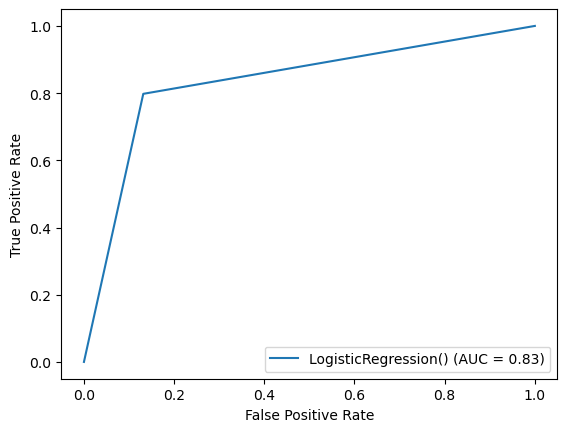

In [208]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,log_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=log)
display.plot()

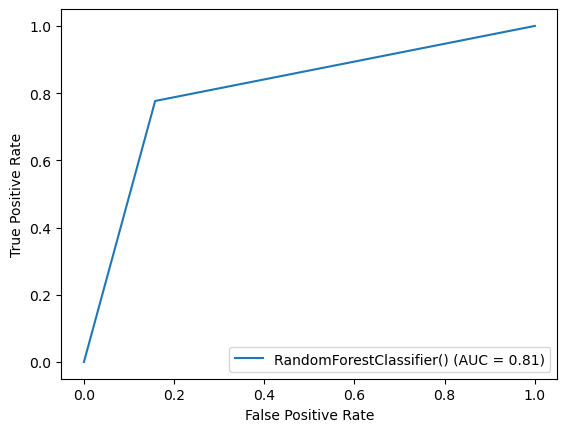

In [209]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,rfc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=rfc)
display.plot()

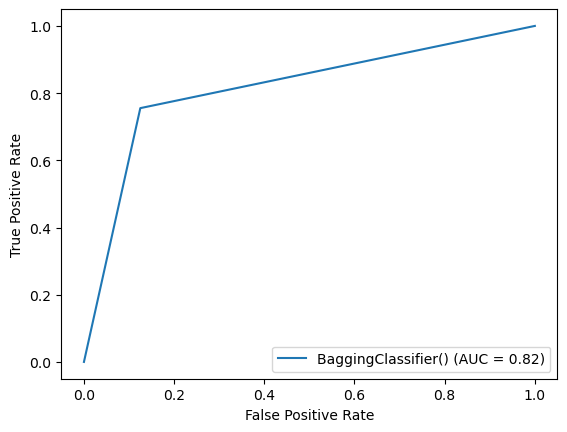

In [210]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,bc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=bc)
display.plot()

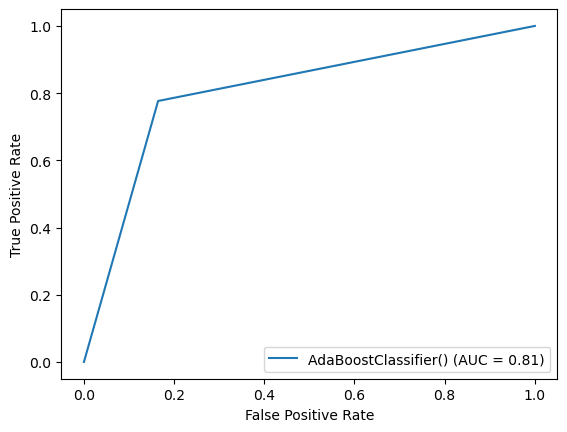

In [211]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,abc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=abc)
display.plot()

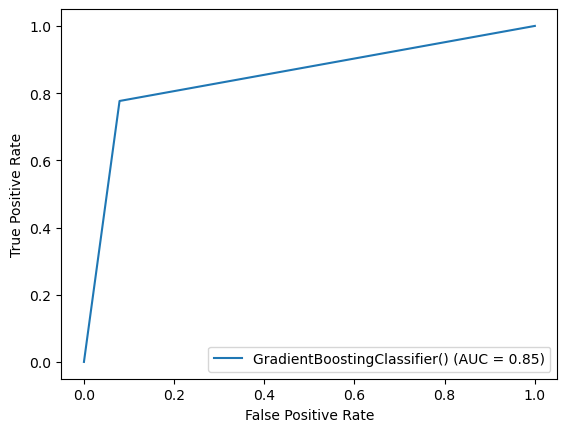

In [212]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,gbc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=gbc)
display.plot()

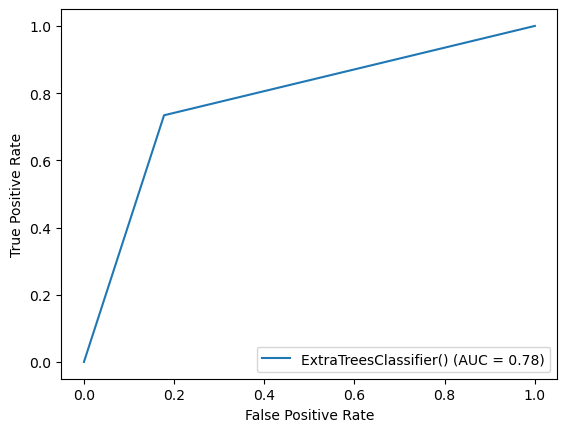

In [213]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,etc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=etc)
display.plot()

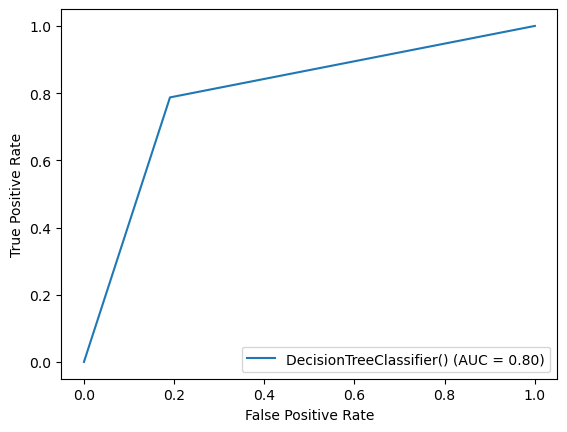

In [214]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,dtc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=dtc)
display.plot()

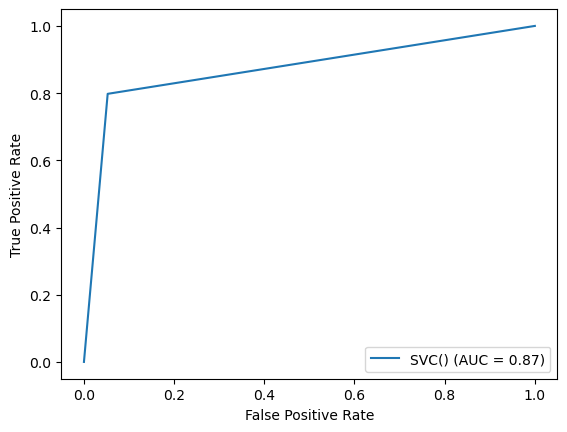

In [215]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,svc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=svc)
display.plot()

#### Plotting for our final model

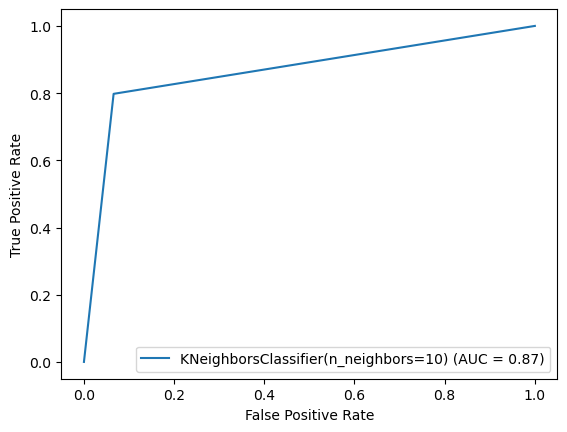

In [216]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,knn_final_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=ship)
display.plot()

### Save the model then load and predict.

In [217]:
#save the model
import joblib
joblib.dump(ship,"titanic_survival_prediction.pkl")

['titanic_survival_prediction.pkl']

In [218]:
#predicting 
model = joblib.load("titanic_survival_prediction.pkl")
result = model.score(x_test,y_test)
print(result)

0.8821138211382114


In [219]:
#create dataframe comparing 
prediction = pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predicted','Actual'])
prediction

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
Predicted,0,0,0,0,0,1,1,0,1,1,...,1,0,1,1,0,0,1,0,1,0
Actual,0,0,1,0,1,1,1,0,1,1,...,1,0,1,1,0,0,1,0,1,0


#### we see there is almost same data in both  actual and predicted columns so, we consider K-Nearest Neighbors as the best model.